In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lets try to read the data

In [2]:
df_airplane=pd.read_csv("Airplane_1908.csv")

In [3]:
df_airplane.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [4]:
df_airplane.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

In [5]:
df_airplane.describe(include="all")

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
count,5268,3049,5248,5250,1069,3562,5241,4933,4040,5246.000000,5256.000000,5246.000000,4878
unique,4753,1005,4303,2476,724,3244,2446,4905,3707,NaN,NaN,NaN,4673
top,09/11/2001,15:00,"Sao Paulo, Brazil",Aeroflot,-,Training,Douglas DC-3,49,178,NaN,NaN,NaN,Crashed during takeoff.
freq,4,32,15,179,67,81,334,3,6,NaN,NaN,NaN,15
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.554518,20.068303,1.608845,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.076711,33.199952,53.987827,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,9.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,23.000000,0.000000,NaN


# Yearly how many planes crashed? how many people were on board? how many survived? how many died?

In [8]:
df_airplane["Year"]=df_airplane["Date"].str[-4:]
df_airplane["Year"]

0       1908
1       1912
2       1913
3       1913
4       1913
        ... 
5263    2009
5264    2009
5265    2009
5266    2009
5267    2009
Name: Year, Length: 5268, dtype: object

In [10]:
grouped=df_airplane.groupby("Year").sum()
grouped

,Aboard,Fatalities,Ground
Year,,,
1908,2.0,1.0,0.0
1912,5.0,5.0,0.0
1913,51.0,45.0,0.0
1915,60.0,40.0,0.0
1916,109.0,108.0,0.0
...,...,...,...
2005,2164.0,1306.0,59.0
2006,1413.0,1136.0,4.0
2007,1364.0,931.0,57.0


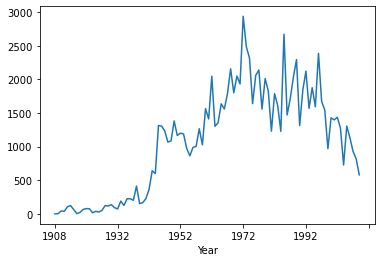

In [54]:
grouped2=grouped["Fatalities"]
grouped2.plot(kind="line")

# Highest number of crashes by operator and Type of aircrafts. 

In [11]:
df_airplane.groupby(["Operator","Route"]).size()

Operator                       Route                                           
A B Aerotransport              Malmo - Amsterdam                                   1
AB Aerotransport               Amsterdam - Malmo                                   1
                               Istanbul-Athens-Rome-Geneve-Copenhagen-Stockholm    1
ACES Colombia                  Bogota - Saravena                                   1
                               Medellin - Bahia Solano                             1
                                                                                  ..
Zantop Air Transport           Detroit, MI - Kansas City, MO                       1
                               Lowery AFB - Ogden Hill AFB                         1
Zantop Airways                 Detroit, MI - Lexington, KY                         1
Zantop International Airlines  Baltimore - Detroit                                 1
Zen Nippon                     Osaka - Tokyo                          

# Lets try to calculate the number of crashes where all people aboard died

In [13]:
df_airplane2=df_airplane.copy()
df_airplane2=df_airplane2[df_airplane2["Aboard"]==df_airplane2["Fatalities"]]

In [16]:
print(len(df_airplane2))

3514


# Lets try to do a monthly analysis of airplane crashes

In [32]:
df_airplane2["Month"]=df_airplane2["Date"].str[0:2]
average=df_airplane2["Month"].value_counts()


In [42]:

df_airplane2["Month"]=pd.DatetimeIndex(df_airplane2["Date"]).month
average=df_airplane2["Month"].value_counts()

Text(0, 0.5, 'Number of crashes')

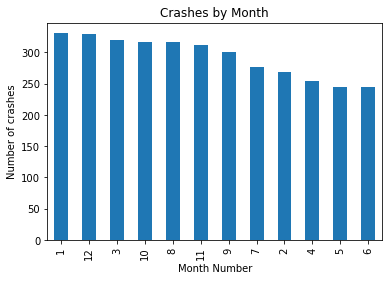

In [45]:
average.plot(kind="bar")
plt.title("Crashes by Month")
plt.xlabel("Month Number")
plt.ylabel("Number of crashes")


# Fatality Rate Calculation

In [58]:
df_airplane["Fatality Rate"]=df_airplane["Fatalities"]/df_airplane["Aboard"]*100
df_airplane["Fatality Rate"]

0        50.0
1       100.0
2       100.0
3        70.0
4       100.0
        ...  
5263     87.5
5264    100.0
5265    100.0
5266    100.0
5267    100.0
Name: Fatality Rate, Length: 5268, dtype: float64

In [59]:
df_airplane["Fatality Rate"].describe()

count    5244.000000
mean       83.493160
std        29.877115
min         0.000000
25%        80.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: Fatality Rate, dtype: float64

In [61]:
df_airplane["Decade"]=df_airplane["Year"].str[0:3]+"0"
df_airplane["Decade"]

0       1900
1       1910
2       1910
3       1910
4       1910
        ... 
5263    2000
5264    2000
5265    2000
5266    2000
5267    2000
Name: Decade, Length: 5268, dtype: object

In [68]:
fatal_decade=df_airplane.groupby("Decade").mean()["Fatality Rate"]
average=df

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

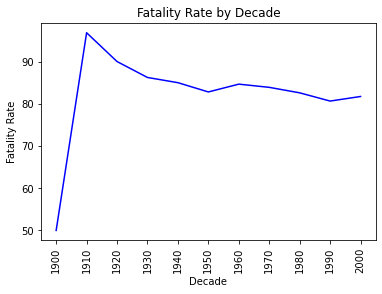

In [75]:
plt.plot(fatal_decade,color="blue")
plt.title("Fatality Rate by Decade")
plt.ylabel("Fatality Rate")
plt.xlabel("Decade")
plt.xticks(rotation="vertical")

# Airline Safety Record

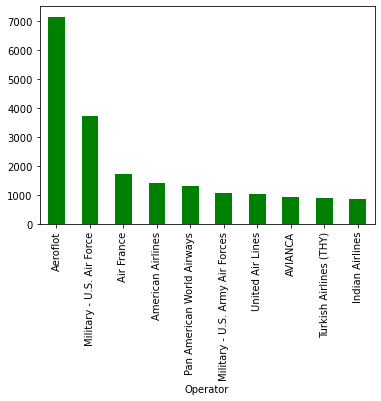

In [85]:
group3=df_airplane.groupby("Operator").sum()["Fatalities"].sort_values(ascending=False).head(10)
group3.plot(kind="bar",color="green")